## 4장 6절 차원 축소

### 2. 주성분 분석

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['class']=iris.target
df_iris['class']=df_iris['class'].map({0:'setosa',1:'versicolour',2:'virginica'})
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
df_x = df_iris.drop(columns='class')
df_x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
from sklearn.preprocessing import StandardScaler
df_x = StandardScaler().fit_transform(df_x)

pd.DataFrame(data=df_x).head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


#### 주성분 추출(PCA: Principle Component Analysis)

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca_fit = pca.fit(df_x)

print('고유값: ', pca.singular_values_)
print('분산 설명력: ', pca.explained_variance_ratio_)

고유값:  [20.92306556 11.7091661   4.69185798  1.76273239]
분산 설명력:  [0.72962445 0.22850762 0.03668922 0.00517871]


#### Scree Plot으로 사용할 주성분의 개수 정하기

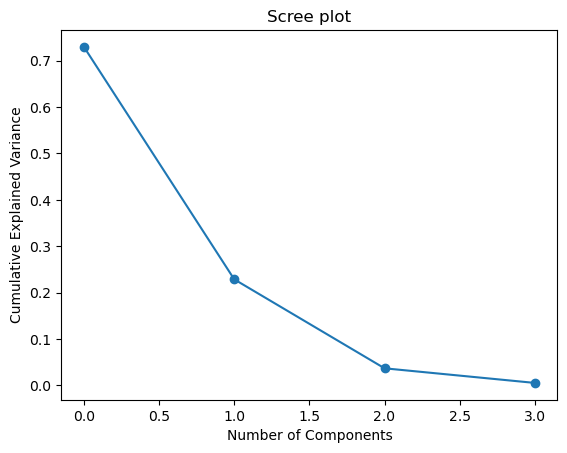

In [10]:
import matplotlib.pyplot as plt

plt.title('Scree plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_, 'o-')
plt.show()

#### 새로운 데이터프레임 확인

In [11]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(df_x)
principal_iris = pd.DataFrame(data=principalComponents, columns=['pc1', 'pc2'])
principal_iris.head()

,pc1,pc2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


#### 주성분 산포도 확인

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

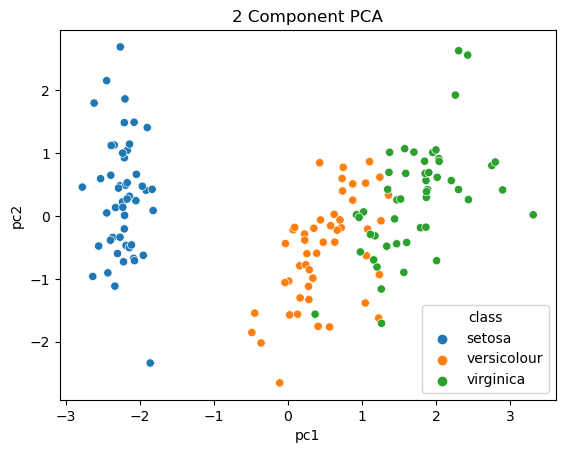

In [20]:
plt.title('2 Component PCA')
sns.scatterplot(x='pc1', y='pc2', hue=df_iris['class'], data=principal_iris)
plt.show()